In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
#reading the data
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [122]:
#displaying the first five entries of the dataset
df_train.head()

,shoe size,height,class
0,8.518110,73.029460,seniors
1,10.301527,68.959677,seniors
2,7.386575,73.558042,seniors
3,9.477281,68.195558,seniors
4,10.910389,75.144672,seniors


Visualising the training and testing data

<AxesSubplot:xlabel='shoe size', ylabel='height'>

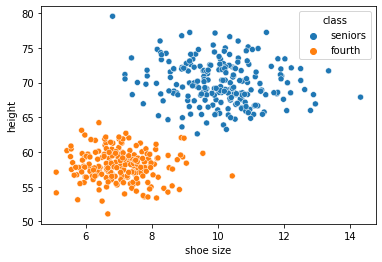

In [123]:
sns.scatterplot(data=df_train, x='shoe size', y='height', hue='class')

<AxesSubplot:xlabel='shoe size', ylabel='height'>

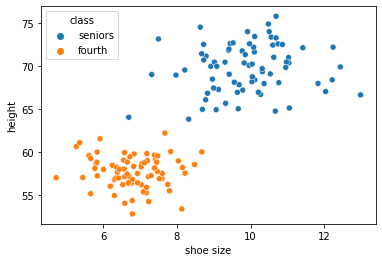

In [124]:
sns.scatterplot(data=df_test, x='shoe size', y='height', hue='class')

In [125]:
x_train=df_train.drop('class',axis=1)
x_test=df_test.drop('class',axis=1)

In [126]:
y_train=df_train['class']
y_test=df_test['class']

In [127]:
x_train 

,shoe size,height
0,8.518110,73.029460
1,10.301527,68.959677
2,7.386575,73.558042
3,9.477281,68.195558
4,10.910389,75.144672
...,...,...
445,6.790728,56.506263
446,6.671880,51.081101
447,6.904876,59.823496
448,6.281759,56.523309


In [128]:
x_test

,shoe size,height
0,12.985509,66.632266
1,9.957683,70.057887
2,10.366656,67.945519
3,10.484072,74.846184
4,10.273374,66.690172
...,...,...
145,6.682775,56.449430
146,8.153464,58.236633
147,5.659880,59.282744
148,7.086087,55.410322


In [129]:
y_train

0      seniors
1      seniors
2      seniors
3      seniors
4      seniors
        ...   
445     fourth
446     fourth
447     fourth
448     fourth
449     fourth
Name: class, Length: 450, dtype: object

In [130]:
y_test

0      seniors
1      seniors
2      seniors
3      seniors
4      seniors
        ...   
145     fourth
146     fourth
147     fourth
148     fourth
149     fourth
Name: class, Length: 150, dtype: object

In [131]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_x_train= scaler.fit_transform(x_train)
scaled_x_test= scaler.fit_transform(x_test)

In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [133]:
import math
math.sqrt(len(y_train))

21.213203435596427

In [134]:
#changing the value of n_neighbors doesnt change the accuracy_score is still stays 0.9933
knn_model = KNeighborsClassifier(n_neighbors=21, metric = 'euclidean')

In [135]:
knn_model.fit(scaled_x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=21)

In [136]:
y_predict = knn_model.predict(scaled_x_test)

In [137]:
from sklearn.metrics import  confusion_matrix, classification_report 

In [138]:
#the confusion matrix is same for every value of k
confusion_matrix(y_test,y_predict)

array([[75,  0],
       [ 1, 74]], dtype=int64)

In [139]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9933333333333333

In [140]:
from sklearn.metrics import accuracy_score

test_error_rates = []
#iterating over different values of k
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_x_train,y_train)
    y_pred_test=knn_model.predict(scaled_x_test)
    test_error_rate = 1-accuracy_score(y_test,y_pred_test)    
    test_error_rates.append(test_error_rate)

In [141]:
#test_error_rates

Text(0.5, 0, 'K Neighbors')

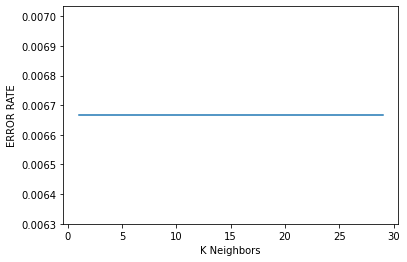

In [116]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K Neighbors')

In [ ]:
# i am not able to choose the optimum value of k by elbow method since error rates 0.0067 are same for each value of k 